In [1]:
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
import pathlib

In [3]:
from collections import OrderedDict as OD
from datetime import datetime

In [4]:
from calendar import month_abbr

In [5]:
import numpy as np 
import pandas as pd 
import xarray as xr

### read the ONI from the CPC 

In [6]:
url = "https://www.cpc.ncep.noaa.gov/data/indices/oni.ascii.txt"

In [7]:
oni = pd.read_table(url,sep=r'\s+', engine='python')

### select the period post 1998

In [8]:
oni = oni.loc[oni.YR > 1998,:]

In [9]:
oni.head()

,SEAS,YR,TOTAL,ANOM
588,DJF,1999,25.08,-1.55
589,JFM,1999,25.55,-1.30
590,FMA,1999,26.17,-1.07
591,MAM,1999,26.62,-0.98
592,AMJ,1999,26.68,-1.02


In [10]:
oni.tail()

,SEAS,YR,TOTAL,ANOM
834,JJA,2019,27.57,0.30
835,JAS,2019,27.10,0.11
836,ASO,2019,26.95,0.13
837,SON,2019,27.06,0.29
838,OND,2019,27.18,0.46


### set the year for the BAMS report 

In [11]:
year = 2019

### set the season (string corresponding to the season in the ONI index)

In [12]:
dict_season = {}

dict_season['JFM'] = [1, 3]
dict_season['FMA'] = [2, 4]
dict_season['MAM'] = [3, 5]
dict_season['AMJ'] = [4, 6]
dict_season['MJJ'] = [5, 7]
dict_season['JJA'] = [6, 8]
dict_season['JAS'] = [7, 9]
dict_season['ASO'] = [8, 10]
dict_season['SON'] = [9, 11]
dict_season['OND'] = [10, 12]

In [13]:
season = 'OND'
# season = 'JFM'
# season = 'JJA'

### months spanned by the season

In [14]:
months = dict_season[season]

In [15]:
title = f"{month_abbr[months[0]]} - {month_abbr[months[1]]}"

In [16]:
title

'Jan - Mar'

### selects the Oceanic Nino Index seasonal values for the season 

In [17]:
oni_seas = oni.loc[oni.SEAS == season]

In [18]:
oni_seas

,SEAS,YR,TOTAL,ANOM
589,JFM,1999,25.55,-1.30
601,JFM,2000,25.44,-1.41
613,JFM,2001,26.26,-0.52
625,JFM,2002,26.81,0.03
637,JFM,2003,27.41,0.63
649,JFM,2004,27.08,0.31
661,JFM,2005,27.36,0.58
673,JFM,2006,26.10,-0.67
685,JFM,2007,27.09,0.32
697,JFM,2008,25.35,-1.42


### threshold used to define the ENSO events (NINO, NINA, NEUTRAL)

In [19]:
ONI_threshold = 0.5

In [20]:
ninos = oni_seas.query('ANOM > {}'.format(ONI_threshold))

In [21]:
ninas = oni_seas.query('ANOM < {}'.format(-ONI_threshold))

In [22]:
neutral = oni_seas.query(f'{-ONI_threshold} <= ANOM <= {ONI_threshold}')

In [23]:
ninos

,SEAS,YR,TOTAL,ANOM
637,JFM,2003,27.41,0.63
661,JFM,2005,27.36,0.58
721,JFM,2010,28.09,1.31
781,JFM,2015,27.34,0.56
793,JFM,2016,29.01,2.23
829,JFM,2019,27.59,0.82


In [24]:
len(ninos)

6

In [25]:
ninas

,SEAS,YR,TOTAL,ANOM
589,JFM,1999,25.55,-1.30
601,JFM,2000,25.44,-1.41
613,JFM,2001,26.26,-0.52
673,JFM,2006,26.10,-0.67
697,JFM,2008,25.35,-1.42
709,JFM,2009,26.08,-0.69
733,JFM,2011,25.68,-1.09
745,JFM,2012,26.15,-0.62
817,JFM,2018,26.02,-0.76


In [26]:
len(ninas)

9

In [27]:
neutral

,SEAS,YR,TOTAL,ANOM
625,JFM,2002,26.81,0.03
649,JFM,2004,27.08,0.31
685,JFM,2007,27.09,0.32
757,JFM,2013,26.44,-0.33
769,JFM,2014,26.41,-0.36
805,JFM,2017,26.71,-0.06


In [28]:
len(neutral)

6

## Now reads the CMORPH dataset 

**NOTE**: need to run 
    
    
```
cdo settunits,days cmorph_monthly.nc cmorph_monthly_jan1998-jan2020.nc

```

in the `CDO` environment  

in order to set the calendar so that it can be read by xarray ... 

or alternatively (solution below) is to read without decoding the times, then create a time index using pandas.date_range

In [29]:
dset = xr.open_dataset('../CMORPH/cmorph_monthly_from_KNMI.nc', decode_times=False)

In [30]:
dset

<xarray.Dataset>
Dimensions:  (lat: 240, lon: 720, time: 265)
Coordinates:
  * lon      (lon) float32 0.25 0.75 1.25 1.75 ... 358.25 358.75 359.25 359.75
  * lat      (lat) float32 -59.75 -59.25 -58.75 -58.25 ... 58.75 59.25 59.75
  * time     (time) float64 0.0 1.0 2.0 3.0 4.0 ... 261.0 262.0 263.0 264.0
Data variables:
    prcp     (time, lat, lon) float32 ...
Attributes:
    CDI:                        Climate Data Interface version 1.6.9 (http://...
    history:                    Sun Jan 12 11:45:23 2020: cdo settaxis,1998-0...
    institution:                NCEP/CPC
    Conventions:                CF-1.0
    title:                      CMORPH Version 1.0, RAW daily precip from 00Z...
    source_url:                 http://www.cpc.ncep.noaa.gov/products/janowia...
    reference:                  Joyce, R. J., J. E. Janowiak, P. A. Arkin, an...
    geospatial_lat_min:         -60.0
    geospatial_lat_max:         60.0
    geospatial_lat_units:       degrees_north
    geospatial_lon_min:         0.0
    geospatial_lon_max:         360.0
    geospatial_lon_units:       degrees_east
    geospatial_lat_resolution:  0.5
    geospatial_lon_resolution:  0.5
    time_coverage_start:        1998-01-01
    time_coverage_end:          2020-01-10
    climexp_url:                https://climexp.knmi.nl/select.cgi?cmorph_daily
    CDO:                        Climate Data Operators version 1.6.9 (http://...

### we have to create a proper time index using pandas 

In [31]:
dset['time'] = pd.date_range(start='1998-1-1', periods=len(dset.time), freq='MS')

In [32]:
dset

<xarray.Dataset>
Dimensions:  (lat: 240, lon: 720, time: 265)
Coordinates:
  * lon      (lon) float32 0.25 0.75 1.25 1.75 ... 358.25 358.75 359.25 359.75
  * lat      (lat) float32 -59.75 -59.25 -58.75 -58.25 ... 58.75 59.25 59.75
  * time     (time) datetime64[ns] 1998-01-01 1998-02-01 ... 2020-01-01
Data variables:
    prcp     (time, lat, lon) float32 ...
Attributes:
    CDI:                        Climate Data Interface version 1.6.9 (http://...
    history:                    Sun Jan 12 11:45:23 2020: cdo settaxis,1998-0...
    institution:                NCEP/CPC
    Conventions:                CF-1.0
    title:                      CMORPH Version 1.0, RAW daily precip from 00Z...
    source_url:                 http://www.cpc.ncep.noaa.gov/products/janowia...
    reference:                  Joyce, R. J., J. E. Janowiak, P. A. Arkin, an...
    geospatial_lat_min:         -60.0
    geospatial_lat_max:         60.0
    geospatial_lat_units:       degrees_north
    geospatial_lon_min:         0.0
    geospatial_lon_max:         360.0
    geospatial_lon_units:       degrees_east
    geospatial_lat_resolution:  0.5
    geospatial_lon_resolution:  0.5
    time_coverage_start:        1998-01-01
    time_coverage_end:          2020-01-10
    climexp_url:                https://climexp.knmi.nl/select.cgi?cmorph_daily
    CDO:                        Climate Data Operators version 1.6.9 (http://...

### restrict the domain to [110.,-30.,280.,20.] for tthe sector plots

In [33]:
dset = dset.sel(lat=slice(-40., 30.), lon=slice(150, 360 - 90))

### calculate the climatology 

In [34]:
clim = dset.sel(time=slice('1998','2018'))

In [35]:
clim = clim.groupby(clim.time.dt.month).mean('time')

In [36]:
lon_sectors = [150, 180, (360-150), (360-120), (360-90)]
lon_labels = ['150E','180','150W','120W','90W']

### calculates the seasonal averages from the monthly means 

In [37]:
dset_seas = dset.rolling(time=3, min_periods=3).mean()

In [38]:
dset_seas

<xarray.Dataset>
Dimensions:  (lat: 140, lon: 240, time: 265)
Coordinates:
  * lon      (lon) float32 150.25 150.75 151.25 151.75 ... 268.75 269.25 269.75
  * lat      (lat) float32 -39.75 -39.25 -38.75 -38.25 ... 28.75 29.25 29.75
  * time     (time) datetime64[ns] 1998-01-01 1998-02-01 ... 2020-01-01
Data variables:
    prcp     (time, lat, lon) float32 nan nan nan ... 1.5302474 1.5843872

In [39]:
dset_seas = dset_seas.sel(time=(dset_seas.time.dt.month == months[1]))

In [40]:
from datetime import datetime

In [41]:
time_index_ninos = [datetime(y, months[1], 1) for y in ninos.YR.values]
time_index_ninas = [datetime(y, months[1], 1) for y in ninas.YR.values]
time_index_neutral = [datetime(y, months[1], 1) for y in neutral.YR.values]

In [42]:
ninos_cmorph = dset_seas.sel(time=time_index_ninos)

In [43]:
ninas_cmorph = dset_seas.sel(time=time_index_ninas)

In [44]:
neutral_cmorph = dset_seas.sel(time=time_index_neutral)

In [45]:
lon_sectors = [150, 180, (360-150), (360-120), (360-90)]

lon_labels = ['150E','180','150W','120W','90W']

### selects the sector index here 

In [46]:
i = 0

In [47]:
label_sector = f"{lon_sectors[i]}E - {lon_sectors[i+1]}E"

In [48]:
label_sector

'240E - 270E'

In [49]:
sector_seas_ninos = ninos_cmorph.sel(lon=slice(lon_sectors[i],lon_sectors[i+1])).mean('lon')

In [50]:
sector_seas_ninas = ninas_cmorph.sel(lon=slice(lon_sectors[i],lon_sectors[i+1])).mean('lon')

In [51]:
sector_seas_neutral = neutral_cmorph.sel(lon=slice(lon_sectors[i],lon_sectors[i+1])).mean('lon')

In [52]:
last_year = dset_seas.sel(time=f"{year}-{months[1]}")

In [53]:
last_year = last_year.sel(lon=slice(lon_sectors[i],lon_sectors[i+1])).mean('lon')

In [54]:
sector_seas_ninos = sector_seas_ninos.to_dataframe().unstack()

In [55]:
sector_seas_ninas = sector_seas_ninas.to_dataframe().unstack()

In [56]:
sector_seas_neutral = sector_seas_neutral.to_dataframe().unstack()

In [57]:
last_year = last_year.to_dataframe()

In [58]:
last_year = last_year.loc[:,'prcp']

In [59]:
last_year.index = last_year.index.droplevel(1)

In [60]:
last_year

lat
-39.75    3.215678
-39.25    3.216356
-38.75    3.173864
-38.25    3.203128
-37.75    3.088732
            ...   
 27.75    1.282520
 28.25    1.218999
 28.75    1.216983
 29.25    1.165117
 29.75    0.981225
Name: prcp, Length: 140, dtype: float32

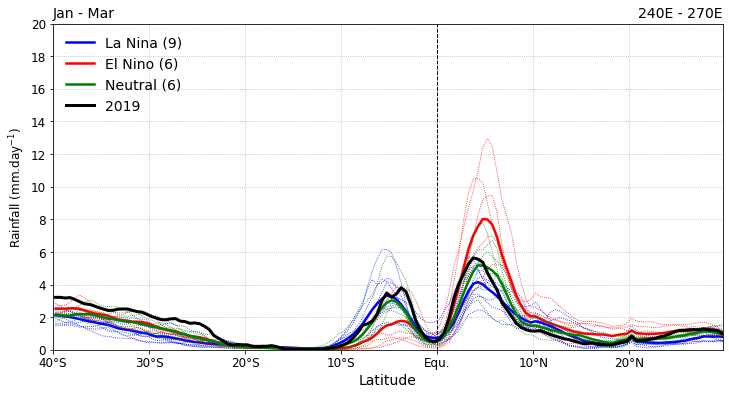

In [61]:
f, ax = plt.subplots(figsize=(12,6))

ax.axvline(0, lw=1, color='k', ls='--')

sector_seas_ninas.plot(ax=ax, color='b', legend=None, ls=':', lw=0.8)
LN, = ax.plot(sector_seas_ninas.index, sector_seas_ninas.mean(axis=1), color='b', lw=2.5)

sector_seas_ninos.plot(ax=ax, color='r', legend=None, ls=':', lw=0.8)
EN, = ax.plot(sector_seas_ninos.index, sector_seas_ninos.mean(axis=1), color='r', lw=2.5)

sector_seas_neutral.plot(ax=ax, color='g', legend=None, ls=':', lw=0.8)
N, = ax.plot(sector_seas_neutral.index, sector_seas_neutral.mean(axis=1), color='g', lw=2.5)

LY, = ax.plot(last_year.index, last_year, color='k', lw=3)

ax.legend([LN, EN, N, LY], [f'La Nina ({len(ninas)})', f'El Nino ({len(ninos)})', f'Neutral ({len(neutral)})', str(year)], fontsize=14, loc=2, frameon=False )

ax.set_xticks(np.arange(-40, 30, 10))
ax.set_xticklabels([u'40\u00B0S',u'30\u00B0S',u'20\u00B0S',u'10\u00B0S','Equ.',u'10\u00B0N',u'20\u00B0N',u'30\u00B0N'], fontsize=12); 
ax.set_xlabel('Latitude', fontsize=14)

ax.set_yticks(np.arange(0, 22, 2)); 
ax.set_yticklabels(np.arange(0, 22, 2), fontsize=12); 
ax.set_ylabel("Rainfall (mm.day$^{-1}$)", fontsize=12)

ax.set_ylim(0, 20)

ax.grid(ls=':')

ax.set_title(title, loc='left', fontsize=14)

ax.set_title(label_sector, loc='right', fontsize=14)

f.savefig(f'../figures/comparison_last_year_ENSOs_{season}_{label_sector.replace(" ","")}.png', dpi=200)